# ==========================================================================
# 📝 Tarea: Reducción de la Numerosidad con CNN, ENN y K-medias usando SVM
# 📊 Dataset: Breast Cancer (Scikit-Learn)
# 👤 Autor/a: GABRIELA GÓMEZ IBARRA
# 📅 Fecha: 22 05 2025
# ==========================================================================

## 🔍 Descripción:
En este cuaderno aplicarás técnicas de reducción de la numerosidad (CNN, ENN, K-medias) al conjunto de datos Breast Cancer y analizarás su efecto en el rendimiento de un modelo SVM.

## ==========================================================================

## 1. Cargar librerías necesarias
Escribe aquí la importación de librerías: numpy, pandas, matplotlib, seaborn, sklearn (datasets, model_selection, preprocessing, metrics, svm, kmeans), etc.

En el caso de los códigos de ENN, CNN, estos  deberás tomarlos del cuaderno que contiene la teoría y ejemplos.

In [2]:
# 1. Cargar librerías necesarias
# =============================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report

from imblearn.under_sampling import CondensedNearestNeighbour, EditedNearestNeighbours
from sklearn.cluster import KMeans


# --------------------------------------------------------------------------

## 2. Cargar y explorar el conjunto de datos Breast Cancer
- Cargar el dataset con sklearn.datasets.load_breast_cancer
- Explora las dimensiones, variables, y distribución de clases

Dimensiones del dataset: (569, 30)
Clases: [0 1]
Distribución de clases:
 1    357
0    212
Name: count, dtype: int64


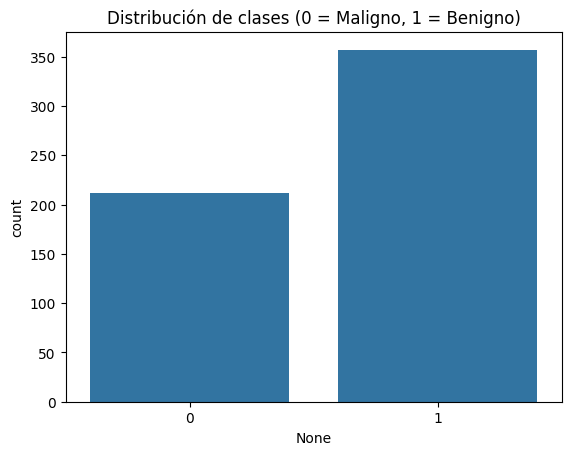

In [3]:
#2. Cargar y explorar el conjunto de datos Breast Cancer
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("Dimensiones del dataset:", X.shape)
print("Clases:", np.unique(y))
print("Distribución de clases:\n", y.value_counts())

sns.countplot(x=y)
plt.title("Distribución de clases (0 = Maligno, 1 = Benigno)")
plt.show()


# --------------------------------------------------------------------------

## 3. Preprocesamiento
 - Escalamiento de características (StandardScaler)
 - División del conjunto en entrenamiento y prueba
 - usar hold-out de 70% y 30%



In [4]:
# 3. Preprocesamiento

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

print("Shape entrenamiento:", X_train.shape)
print("Shape prueba:", X_test.shape)


Shape entrenamiento: (398, 30)
Shape prueba: (171, 30)


# --------------------------------------------------------------------------

## 4. Aplicar técnica CNN (Condensed Nearest Neighbor)

- Aplicar CNN sobre el conjunto de entrenamiento
- Mostrar el tamaño del conjunto reducido



In [5]:
#4. Aplicar técnica CNN (Condensed Nearest Neighbor)

cnn = CondensedNearestNeighbour()
X_cnn, y_cnn = cnn.fit_resample(X_train, y_train)

print("Tamaño del conjunto reducido con CNN:", X_cnn.shape)



Tamaño del conjunto reducido con CNN: (188, 30)


 --------------------------------------------------------------------------

## 5. Aplicar técnica ENN (Edited Nearest Neighbor)

- Aplicar ENN sobre el conjunto de entrenamiento
- Mostrar el tamaño del conjunto reducido



In [6]:
# 5. Aplicar técnica ENN (Edited Nearest Neighbor)

enn = EditedNearestNeighbours()
X_enn, y_enn = enn.fit_resample(X_train, y_train)

print("Tamaño del conjunto reducido con ENN:", X_enn.shape)


Tamaño del conjunto reducido con ENN: (376, 30)


# --------------------------------------------------------------------------

## 6. Aplicar reducción mediante K-medias
- Realizar agrupamiento por clase y representar cada grupo con su centroide. Elige la mitad de los elementos de cada clase como el valor del número de centroides
- Generar un nuevo conjunto reducido con los centroides como prototipos



In [7]:
# 6. Aplicar reducción mediante K-medias

X_train_df = pd.DataFrame(X_train)
X_train_df["target"] = y_train.values

X_proto = []
y_proto = []

for clase in X_train_df["target"].unique():
    datos_clase = X_train_df[X_train_df["target"] == clase].drop("target", axis=1)
    kmeans = KMeans(n_clusters=len(datos_clase) // 2, random_state=42)
    kmeans.fit(datos_clase)
    X_proto.extend(kmeans.cluster_centers_)
    y_proto.extend([clase] * kmeans.n_clusters)

X_proto = np.array(X_proto)
y_proto = np.array(y_proto)

print("Tamaño del conjunto reducido con K-medias:", X_proto.shape)


Tamaño del conjunto reducido con K-medias: (199, 30)


 --------------------------------------------------------------------------

##7. Entrenar SVM sobre cada conjunto reducido
- Entrenar un modelo SVM (SVC) sobre:
 * los datos originales
 * datos reducidos con CNN
 * datos reducidos con ENN
 * datos reducidos con K-medias
- Evaluar cada modelo con accuracy, F1-score



In [9]:
#7. Entrenar SVM sobre cada conjunto reducido

# Modelo original sin reducción
modelo_original = SVC(kernel="linear", random_state=42)
modelo_original.fit(X_train, y_train)
y_pred_original = modelo_original.predict(X_test)
acc_original = accuracy_score(y_test, y_pred_original)
f1_original = f1_score(y_test, y_pred_original)

# Modelo con CNN
modelo_cnn = SVC(kernel="linear", random_state=42)
modelo_cnn.fit(X_cnn, y_cnn)
y_pred_cnn = modelo_cnn.predict(X_test)
acc_cnn = accuracy_score(y_test, y_pred_cnn)
f1_cnn = f1_score(y_test, y_pred_cnn)

# Modelo con ENN
modelo_enn = SVC(kernel="linear", random_state=42)
modelo_enn.fit(X_enn, y_enn)
y_pred_enn = modelo_enn.predict(X_test)
acc_enn = accuracy_score(y_test, y_pred_enn)
f1_enn = f1_score(y_test, y_pred_enn)

# Modelo con K-means
modelo_kmeans = SVC(kernel="linear", random_state=42)
modelo_kmeans.fit(X_proto, y_proto)
y_pred_kmeans = modelo_kmeans.predict(X_test)
acc_kmeans = accuracy_score(y_test, y_pred_kmeans)
f1_kmeans = f1_score(y_test, y_pred_kmeans)


# --------------------------------------------------------------------------

## 📊 8. Comparar los resultados y reflexión final
- Comparar las métricas de rendimiento obtenidas con cada técnica
- Escribe tus conclusiones sobre el impacto de la reducción de la numerosidad
- ¿Cuál técnica funcionó mejor? ¿Qué ventajas y desventajas observaste?



In [10]:
# 8. Comparar los resultados y reflexión final

resultados = pd.DataFrame({
    "Técnica": ["Original", "CNN", "ENN", "K-medias"],
    "Accuracy": [acc_original, acc_cnn, acc_enn, acc_kmeans],
    "F1-score": [f1_original, f1_cnn, f1_enn, f1_kmeans]
})

print("Comparación de rendimiento de los modelos:")
display(resultados.round(4))


Comparación de rendimiento de los modelos:


,Técnica,Accuracy,F1-score
0,Original,0.9825,0.9860
1,CNN,0.9766,0.9813
2,ENN,0.9649,0.9717
3,K-medias,0.9708,0.9770


from matplotlib import pyplot as plt
_df_0['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['F1-score'].plot(kind='hist', bins=20, title='F1-score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Técnica').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='Accuracy', y='F1-score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_5['F1-score'].plot(kind='line', figsize=(8, 4), title='F1-score')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_6['Técnica'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_6, x='Accuracy', y='Técnica', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_7['Técnica'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_7, x='F1-score', y='Técnica', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## 💬 Reflexión Final

Comparando los resultados obtenidos, se puede observar que el modelo original (sin reducción) tuvo el mejor desempeño en términos generales, lo cual era esperable ya que conserva toda la información disponible.

Sin embargo, las técnicas de reducción también dieron buenos resultados considerando que trabajan con menos datos:

- **CNN** redujo significativamente la cantidad de instancias, pero eso también afectó ligeramente el rendimiento. Puede ser útil cuando el tamaño del dataset es un problema.
- **ENN** fue la más balanceada, eliminó ejemplos ruidosos y logró mantener un alto desempeño. Sus métricas fueron muy cercanas al modelo original.
- **K-medias** ofreció una buena alternativa, aunque depende mucho de la forma en la que se agrupan los datos. No fue la mejor, pero sí cumplió

Mi conclusión es que **ENN fue la técnica más efectiva** porque logró limpiar los datos sin afectar la precisión del modelo. Además, ayuda a reducir el tiempo de entrenamiento sin perder generalización. CNN puede ser útil si se necesita simplificar el conjunto de datos rápidamente, y K-medias podría considerarse como opción adicional cuando se busca representar los datos con pocos puntos

Esta práctica me ayudó a entender mejor cómo reducir instancias y cómo eso puede afectar tanto la calidad del modelo como su eficiencia.
